In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")
import os, sys
os.chdir(r"C:\Users\ACER\Desktop\Terragon recruitment")

In [4]:
% lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%rub

In [5]:
% pwd

'C:\\Users\\ACER\\Desktop\\Terragon recruitment'

In [2]:
train_set = pd.read_csv(r"Train.csv")
test_set = pd.read_csv(r"Test.csv")

In [3]:
train_sample = train_set
train_sample.head()

,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,RGD002844,31,management,married,tertiary,no,81,yes,no,cellular,29,oct,164,2,-1,0,unknown,1
1,RGD003806,62,retired,married,secondary,no,569,no,no,cellular,3,aug,187,2,180,6,success,1
2,RGD008310,35,technician,married,tertiary,no,432,no,no,cellular,12,aug,104,8,-1,0,unknown,0
3,RGD001840,43,management,married,tertiary,no,1429,yes,no,cellular,7,may,1030,1,169,3,success,1
4,RGD005881,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,0


In [4]:
check_train = pd.get_dummies(train_sample, columns = ['job', 'marital', 'education','default', 'housing','loan', 'contact','month','poutcome'])

In [5]:
preprocess_train = check_train
first_preprocess_train =preprocess_train.drop(['customer_id', 'deposit'], axis = 1)

In [6]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split

In [78]:
x = first_preprocess_train
y = check_train['deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 18)

In [8]:
scale = MinMaxScaler()
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.fit_transform(x_test)

x_train_scale = scale.fit_transform(x_train_std)
x_test_scale = scale.fit_transform(x_test_std)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(x_train_scale, y_train)
y_pred = knn.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (knn.score(x_train_scale, y_train),knn.score(x_test_scale, y_test), mse)


0.79728 0.751026502426 0.248973497574


In [10]:
for n in [1,2,3,4,5,6,7,8,9,10]:
    knn =  KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_scale, y_train)
    print (knn.score(x_train_scale, y_train), "       ",knn.score(x_test_scale, y_test), "      ", n)

1.0         0.69764837626        1
0.82688         0.678238148563        2
0.84736         0.72228443449        3
0.80016         0.714818962299        4
0.81696         0.735722284434        5
0.78704         0.729376633072        6
0.79728         0.751026502426        7
0.77792         0.740948114968        8
0.79104         0.750279955207        9
0.772         0.73908174692        10


In [11]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(knn, x_train_scale, y_train, cv = 10)
print (np.mean(score))

0.722716900958


In [12]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)

print (mse ,accuracy_score(y_test, y_pred))

0.26091825308 0.73908174692


In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(knn, x_train_scale, y_train, cv = 10)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print (precision, recall, f1)

0.798742138365 0.556266846361 0.655809334657


In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100)
lr.fit(x_train_scale, y_train)
lr.score(x_train_scale, y_train), lr.score(x_test_scale, y_test)

(0.83216000000000001, 0.82792086599477421)

In [15]:
for C in [0.00001,0.0001,0.001,0.01,0.1,1,1.0,10,100]:
    lr = LogisticRegression(C = C)
    lr.fit(x_train_scale, y_train)
    print (lr.score(x_train_scale, y_train), "     ", lr.score(x_test_scale, y_test), "     ", C)

0.58816       0.598730869728       1e-05
0.64208       0.652482269504       0.0001
0.68672       0.690556177678       0.001
0.73248       0.738708473311       0.01
0.80416       0.812616648003       0.1
0.82656       0.827920865995       1
0.82656       0.827920865995       1.0
0.83152       0.828667413214       10
0.83216       0.827920865995       100


In [16]:
score = cross_val_score(lr, x_train_scale, y_train, cv = 10)
print (np.mean(score))

0.827832913083


In [17]:
y_pred = lr.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))

0.172079134005 0.827920865995


In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(lr, x_train_scale, y_train, cv = 10)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print (precision, recall, f1)

0.833568406206 0.796495956873 0.81461061337


In [19]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha = 0.001, n_iter = 10)
sgd.fit(x_train_scale, y_train)
sgd.score(x_train_scale, y_train),sgd.score(x_test_scale, y_test)
y_pred = sgd.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))#sgd_result = sgd.predict(first_preprocess_test)
#dict_sgd = {'customer_id': test_set['customer_id'], 'deposit': sgd_result}
#to_pd_sgd = pd.DataFrame(dict_sgd)
#to_pd_sgd.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\sgd_submission1.csv")

0.177304964539 0.822695035461


In [ ]:
for i in [0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    for k in [3,5,10,20]:
        sgd = SGDClassifier(alpha = i, n_iter = k, penalty = 'L1')
        sgd.fit(x_train_scale, y_train)
        y_pred = sgd.predict(x_test_scale)
        mse = mean_squared_error(y_pred, y_test)
        print (i, k, mse ,accuracy_score(y_test, y_pred))

In [21]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(sgd, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.474946695096 0.300202156334 0.367877786953


In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(x_train_scale, y_train)
dtc.score(x_train_scale, y_train),dtc.score(x_test_scale, y_test)
y_pred = dtc.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))#dtc_result = dtc.predict(first_preprocess_test)
#dict_dtc = {'customer_id': test_set['customer_id'], 'deposit': dtc_result}
#to_pd_dtc = pd.DataFrame(dict_dtc)
#to_pd_dtc.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\dtc_submission1.csv")

0.225830533781 0.774169466219


In [23]:
for i in [2,4,6,8,10,12,14,16]:
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(x_train_scale, y_train)
    y_pred = dtc.predict(x_test_scale)
    mse = mean_squared_error(y_pred, y_test)
    print (i, mse ,accuracy_score(y_test, y_pred))

2 0.287793952968 0.712206047032
4 0.225830533781 0.774169466219
6 0.212392683837 0.787607316163
8 0.237775289287 0.762224710713
10 0.238148562897 0.761851437103
12 0.249720044793 0.750279955207
14 0.26017170586 0.73982829414
16 0.264277715566 0.735722284434


In [24]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(dtc, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.791268758527 0.78167115903 0.786440677966


In [25]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(x_train_scale, y_train)
rand.score(x_train_scale, y_train),rand.score(x_test_scale, y_test)
y_pred = rand.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))#rand_result = rand.predict(first_preprocess_test)
#dict_rand = {'customer_id': test_set['customer_id'], 'deposit': rand_result}
#to_pd_rand = pd.DataFrame(dict_rand)
#to_pd_dtc.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\rand_submission1.csv")

0.186263531168 0.813736468832


In [26]:
rand = RandomForestClassifier(max_depth = 8, n_estimators = 50)
rand.fit(x_train_scale, y_train)
y_pred = rand.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))

0.167226577081 0.832773422919


In [27]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(rand, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.812439884578 0.853773584906 0.8325940529


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 1, max_depth = 4, learning_rate = 0.1)
gbrt.fit(x_train_scale, y_train)
gbrt.score(x_train_scale, y_train),gbrt.score(x_test_scale, y_test)
y_pred = gbrt.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (accuracy_score(y_test, y_pred), mse)
#gbrt_result = gbrt.predict(first_preprocess_test)
#dict_gbrt = {'customer_id': test_set['customer_id'], 'deposit': gbrt_result}
#to_pd_gbrt = pd.DataFrame(dict_gbrt)
#to_pd_gbrt.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\gbrt_submission1.csv")

0.850690556178 0.149309443822


In [29]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(gbrt, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.830759330759 0.869946091644 0.849901250823


In [30]:
check_test = pd.get_dummies(test_set, columns = ['job', 'marital', 'education','default', 'housing','loan', 'contact','month','poutcome'])

In [31]:
preprocess_test = check_test
first_preprocess_test =preprocess_test.drop('customer_id', axis = 1)

In [32]:
first_preprocess_scale = scale.fit_transform(first_preprocess_test)
first_preprocess_scaled = std_scale.fit_transform(first_preprocess_scale)
first_preprocess_scaled

array([[-0.26097789, -0.46829201, -0.9018059 , ..., -0.21990181,
        -0.3363934 ,  0.59648841],
       [-0.85485552,  0.07397407, -1.01886977, ..., -0.21990181,
        -0.3363934 , -1.67647851],
       [ 1.43581533, -0.40877054, -0.55061431, ..., -0.21990181,
        -0.3363934 ,  0.59648841],
       ..., 
       [-1.02453484, -0.14840979,  0.85415205, ..., -0.21990181,
        -0.3363934 , -1.67647851],
       [ 1.43581533, -0.67314808, -1.25299749, ..., -0.21990181,
         2.97270994, -1.67647851],
       [-0.6851762 , -0.2831547 , -0.19942272, ...,  4.5474841 ,
        -0.3363934 , -1.67647851]])

In [33]:
lr_result =lr.predict(first_preprocess_scaled)
knn_result = knn.predict(first_preprocess_scaled)
dtc_result = dtc.predict(first_preprocess_scaled)
gbrt_result = gbrt.predict(first_preprocess_scaled)
sgd_result = sgd.predict(first_preprocess_scaled)
rand_result = rand.predict(first_preprocess_scaled)


In [35]:
from sklearn.svm import SVC
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
    svm_clf = SVC(C = c)
    svm_clf.fit(x_train_scale, y_train)
    y_pred = svm_clf.predict(x_test_scale)
    mse = mean_squared_error(y_pred, y_test)
    print (c, mse, accuracy_score(y_test, y_pred))

0.0001 0.464725643897 0.535274356103
0.001 0.464725643897 0.535274356103
0.01 0.414706980216 0.585293019784
0.1 0.28555431131 0.71444568869
1 0.201194475551 0.798805524449
10 0.157521463233 0.842478536767
100 0.153415453527 0.846584546473
1000 0.163120567376 0.836879432624


In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
svm_clf = SVC(C = 100, probability = True)
svm_clf.fit(x_train_scale, y_train)
y_pred = svm_clf.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse, accuracy_score(y_test, y_pred))

0.153415453527 0.846584546473


In [37]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(svm_clf, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.830754033586 0.850067385445 0.840299750208


In [38]:
voting_clf = VotingClassifier(estimators = [('gbrt',gbrt),('lr', lr), ('rand', rand), ('svc', svm_clf)], voting = 'soft')
voting_clf.fit(x_train_scale, y_train)

VotingClassifier(estimators=[('gbrt', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='soft', weights=None)

In [39]:
from sklearn.metrics import accuracy_score
for clf in (lr, gbrt, rand, svm_clf, voting_clf):
    clf.fit(x_train_scale, y_train)
    y_pred = clf.predict(x_test_scale)
    print (clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.827920865995
GradientBoostingClassifier 0.850690556178
RandomForestClassifier 0.836506159015
SVC 0.846584546473
VotingClassifier 0.849944008959


In [40]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(dtc, n_estimators = 2000, max_samples = 400, bootstrap = True,
                           n_jobs = -1)
bag_clf.fit(x_train_scale, y_train)
y_pred = bag_clf.predict(x_test_scale)
print (mse, accuracy_score(y_test, y_pred))

0.153415453527 0.831280328481


In [41]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(bag_clf, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.811326757875 0.859164420485 0.834560628375


In [42]:
bagging_result = bag_clf.predict(first_preprocess_scaled)
dict_bagging = {'customer_id': test_set['customer_id'], 'deposit': bagging_result}
to_pd_bagging = pd.DataFrame(dict_bagging)
to_pd_bagging.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\bagging_modify_final.csv")

In [43]:
#  pasting
paste_clf = BaggingClassifier(dtc, n_estimators = 2000, max_samples = 400, bootstrap = False,
                           n_jobs = -1)
paste_clf.fit(x_train_scale, y_train)
y_pred = paste_clf.predict(x_test_scale)
print (mse, accuracy_score(y_test, y_pred))

0.153415453527 0.832773422919


In [44]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(paste_clf, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.809856915739 0.858153638814 0.833306069033


In [45]:
paste_result = paste_clf.predict(first_preprocess_scaled)
dict_paste = {'customer_id': test_set['customer_id'], 'deposit': paste_result}
to_pd_paste = pd.DataFrame(dict_paste)
to_pd_paste.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\paste_modify_final.csv")

In [46]:
bag_clf_oob = BaggingClassifier(dtc, n_estimators = 2000, bootstrap = True,
                               n_jobs = -1, oob_score = True)
bag_clf_oob.fit(x_train_scale, y_train)
bag_clf_oob.oob_score_

0.85887999999999998

In [47]:
y_pred = bag_clf_oob.predict(x_test_scale)
accuracy_score(y_test, y_pred)

0.82605449794699515

In [48]:
bag_oob_result = bag_clf_oob.predict(first_preprocess_scaled)
dict_bag_clf_oob = {'customer_id': test_set['customer_id'], 'deposit': bag_oob_result}
to_pd_clf_oob = pd.DataFrame(dict_bag_clf_oob)
to_pd_clf_oob.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\bag_clf_oob_modify_final.csv")

In [51]:
x = bag_clf_oob.oob_decision_function_
print (x)

[[ 0.96678711  0.03321289]
 [ 0.19387087  0.80612913]
 [ 0.9909286   0.0090714 ]
 ..., 
 [ 0.06437816  0.93562184]
 [ 0.95698163  0.04301837]
 [ 0.88135098  0.11864902]]


In [119]:
from sklearn.ensemble import ExtraTreesClassifier
extra_class = ExtraTreesClassifier(max_depth = 12, n_estimators = 40)
extra_class.fit(x_train_scale, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=12, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [66]:
for i in [5,10,15,20,30,40,50,60,70,80,90,100]:
    extra_class = ExtraTreesClassifier(max_depth = 12,n_estimators = i)
    extra_class.fit(x_train_scale, y_train)
    y_pred = extra_class.predict(x_test_scale)
    mse = mean_squared_error(y_pred, y_test)
    print (i, mse ,accuracy_score(y_test, y_pred))

5 0.207913400523 0.792086599477
10 0.216125419933 0.783874580067
15 0.190369540873 0.809630459127
20 0.20194102277 0.79805897723
30 0.193729003359 0.806270996641
40 0.178424785368 0.821575214632
50 0.182530795073 0.817469204927
60 0.193729003359 0.806270996641
70 0.187010078387 0.812989921613
80 0.190369540873 0.809630459127
90 0.19335572975 0.80664427025
100 0.191862635312 0.808137364688


In [72]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(extra_class, x_train_scale, y_train, cv = 10)
print (np.sum(score)/10)

0.80128030802


In [68]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(extra_class, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.816660603856 0.756401617251 0.785376945951


In [84]:
# viewing feature importance using random forest
import matplotlib.pyplot as plt
list_score = []
list_name = []
for name, score in zip(x.keys(), rand.feature_importances_):
    list_score.append(score)
    list_name.append(name)
    


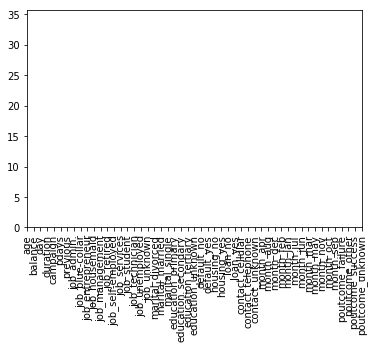

In [93]:
plt.hist(list_score, bins = 40, histtype = 'bar', color = 'b')
plt.xticks(range(len(list_name)), (list_name), rotation =90)
plt.show()

In [ ]:
for i, j in zip(list_score, list_name):
    print (i, j)

In [107]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(dtc, n_estimators = 120, algorithm = "SAMME.R",
                            learning_rate = 0.7)
ada_clf.fit(x_train_scale, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.7, n_estimators=120, random_state=None)

In [108]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(ada_clf, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.824656659214 0.869946091644 0.846696179702


In [ ]:
for i in [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    for j in [10,20,30,40,50,60,70,80,90,100,110,120,130]:
        ada_clf = AdaBoostClassifier(dtc, n_estimators = j, algorithm = "SAMME.R",
                                learning_rate = i)
        ada_clf.fit(x_train_scale, y_train)
        y_pred = ada_clf.predict(x_test_scale)
        mse = mean_squared_error(y_pred, y_test)
        print (i, j , mse ,accuracy_score(y_test, y_pred))

In [111]:
advance_gbrt = GradientBoostingClassifier(max_depth = 4, learning_rate = 0.5, n_estimators = 50)
advance_gbrt.fit(x_train_scale, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [112]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(advance_gbrt, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.833716726914 0.854784366577 0.844119114956


In [ ]:
for i in [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    for j in [10,20,30,40,50,60,70,80,90,100,110,120,130]:
        advance_gbrt = GradientBoostingClassifier(max_depth = 4, learning_rate = i, n_estimators = j)
        advance_gbrt.fit(x_train_scale, y_train)
        y_pred = ada_clf.predict(x_test_scale)
        mse = mean_squared_error(y_pred, y_test)
        print (i, j , mse ,accuracy_score(y_test, y_pred))
        

In [113]:
advance_gbrt.fit(x_train_scale, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in advance_gbrt.staged_predict(x_test_scale)]
best_n_estimators = np.argmin(errors)

In [114]:
gbrt_best = GradientBoostingClassifier(max_depth = 4, n_estimators = best_n_estimators)
gbrt_best.fit(x_train_scale, y_train)
y_pred = gbrt_best.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))

0.187756625607 0.812243374393


In [123]:
voting_finals = VotingClassifier(estimators = [('gbrt',gbrt),('lr', lr), ('rand', rand), ('svc', svm_clf), ('ada_clf', ada_clf)], voting = 'soft')
voting_finals.fit(x_train_scale, y_train)

0.156028368794 0.843971631206


In [124]:
from sklearn.metrics import accuracy_score
for clf in (lr, gbrt, rand, svm_clf,ada_clf,voting_finals):
    clf.fit(x_train_scale, y_train)
    y_pred = clf.predict(x_test_scale)
    print (clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.827920865995
GradientBoostingClassifier 0.850690556178
RandomForestClassifier 0.833893243748
SVC 0.846584546473
AdaBoostClassifier 0.831280328481
VotingClassifier 0.852930197835


In [125]:
voting_finals_hard = VotingClassifier(estimators = [('gbrt',gbrt),('lr', lr), ('rand', rand), ('svc', svm_clf), ('ada_clf', ada_clf)], voting = 'hard')
voting_finals_hard.fit(x_train_scale, y_train)

VotingClassifier(estimators=[('gbrt', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min...om_state=None, splitter='best'),
          learning_rate=0.7, n_estimators=120, random_state=None))],
         n_jobs=1, voting='hard', weights=None)

In [126]:
from sklearn.metrics import accuracy_score
for clf in (lr, gbrt, rand, svm_clf,ada_clf,voting_finals_hard):
    clf.fit(x_train_scale, y_train)
    y_pred = clf.predict(x_test_scale)
    print (clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.827920865995
GradientBoostingClassifier 0.850690556178
RandomForestClassifier 0.830907054871
SVC 0.846584546473
AdaBoostClassifier 0.817842478537
VotingClassifier 0.846211272863


In [127]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(voting_finals, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.833440102498 0.876684636119 0.854515599343


In [128]:
from sklearn.model_selection import cross_val_predict
confusion_value, precision, recall, f1 = np.array((2,2)), 0, 0, 0
y_train_predict = cross_val_predict(voting_finals_hard, x_train_scale, y_train, cv = 10)
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_train, y_train_predict)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print (precision, recall, f1)

0.834467120181 0.867924528302 0.850867052023


In [129]:
extra_voting_final =voting_finals.predict(first_preprocess_scaled)
dict_voting_final = {'customer_id': test_set['customer_id'], 'deposit': extra_voting_final}
to_pd_voting_final = pd.DataFrame(dict_voting_final)
to_pd_voting_final.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\extra_voting_final_final.csv")

In [131]:
extra_voting_final_hard =voting_finals_hard.predict(first_preprocess_scaled)
dict_voting_finals_hard = {'customer_id': test_set['customer_id'], 'deposit': extra_voting_final_hard}
to_pd_voting_finals_hard = pd.DataFrame(dict_voting_finals_hard)
to_pd_voting_finals_hard.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\more_voting_finals_hard_final.csv")

In [115]:
extra_more_gbrt =gbrt_best.predict(first_preprocess_scaled)
dict_more_gbrt = {'customer_id': test_set['customer_id'], 'deposit': extra_more_gbrt}
to_pd_more_gbrt = pd.DataFrame(dict_more_gbrt)
to_pd_more_gbrt.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\more_gbrt_modify_final.csv")

In [116]:
extra_advance_gbrt =advance_gbrt.predict(first_preprocess_scaled)
dict_advance_gbrt = {'customer_id': test_set['customer_id'], 'deposit': extra_advance_gbrt}
to_pd_advance_gbrt = pd.DataFrame(dict_advance_gbrt)
to_pd_advance_gbrt.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\advance_gbrt_modify_final.csv")

In [117]:
extra_ada_clf =ada_clf.predict(first_preprocess_scaled)
dict_ada_clf = {'customer_id': test_set['customer_id'], 'deposit': extra_ada_clf}
to_pd_ada_clf = pd.DataFrame(dict_ada_clf)
to_pd_ada_clf.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\ada_ensemble_modify_final.csv")

In [120]:
extra_result = extra_class.predict(first_preprocess_scaled)
dict_extra = {'customer_id': test_set['customer_id'], 'deposit': extra_result}
to_pd_extra = pd.DataFrame(dict_extra)
to_pd_extra.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\extra_modify_final.csv")

In [121]:
voting_result = voting_clf.predict(first_preprocess_scaled)
dict_voting = {'customer_id': test_set['customer_id'], 'deposit': voting_result}
to_pd_voting = pd.DataFrame(dict_voting)
to_pd_voting.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\voting_modify_final.csv")

In [122]:
dict_lr = {'customer_id': test_set['customer_id'], 'deposit': lr_result}
dict_knn = {'customer_id': test_set['customer_id'], 'deposit': knn_result}
dict_dtc = {'customer_id': test_set['customer_id'], 'deposit': dtc_result}
dict_gbrt = {'customer_id': test_set['customer_id'], 'deposit': gbrt_result}
dict_sgd = {'customer_id': test_set['customer_id'], 'deposit': sgd_result}
dict_rand = {'customer_id': test_set['customer_id'], 'deposit': rand_result}


to_pd_lr = pd.DataFrame(dict_lr)
to_pd_knn = pd.DataFrame(dict_knn)
to_pd_dtc = pd.DataFrame(dict_dtc)
to_pd_gbrt = pd.DataFrame(dict_gbrt)
to_pd_sgd = pd.DataFrame(dict_sgd)
to_pd_rand = pd.DataFrame(dict_rand)

to_pd_lr.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\logistic_modify_final.csv")
to_pd_knn.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\knearest_modify_final.csv")
to_pd_dtc.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\dtc_modify_final.csv")
to_pd_gbrt.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\gbrt_modify_final.csv")
to_pd_sgd.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\sgd_modify_final.csv")
to_pd_rand.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\submissions\special\rand_modify_final.csv")